# 2. Building predicion model

## 2.1 Data import and preprocessing

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\df_train.csv')
df_Kaggle = pd.read_csv('E:\\PycharmProjects\\Kaggle\\Titanic\\df_test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
0,1,0.0,3,22.0,2,1,0.0,7.25000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1.0,1,38.0,2,2,0.5,35.64165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,26.0,1,1,1.0,7.92500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,1.0,1,35.0,2,2,0.5,26.55000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,3,35.0,1,1,0.0,8.05000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_Kaggle.head()

,PassengerId,Survived,Pclass,Age,Family_size,Ticket_frequency,Survival_rate,Fare_per_person,Sex_2,Embarked_2,Embarked_3,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Deck_9
0,892,NaN,3,34.5,1,1,0.0,7.82920,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,893,NaN,3,47.0,2,1,0.0,7.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,894,NaN,2,62.0,1,1,0.0,9.68750,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,895,NaN,3,27.0,1,1,0.0,8.66250,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,896,NaN,3,22.0,3,2,0.5,6.14375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
drop_columns=['PassengerId', 'Survived']
X = df_train.drop(columns=drop_columns)
y = df_train['Survived']

I will split train data into train and test set in order to check quality of prediction on test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_Kaggle = sc.transform(df_Kaggle.drop(columns=drop_columns))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('t_test shape: {}'.format(y_test.shape))

X_train shape: (712, 17)
y_train shape: (712,)
X_test shape: (179, 17)
t_test shape: (179,)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def report(y_pred):
    print(classification_report(y_test, y_pred))
    print('\n')
    print(confusion_matrix(y_test, y_pred))

In [10]:
def save(y_pred, name):
    submission = pd.DataFrame({
            "PassengerId": df_Kaggle["PassengerId"],
            "Survived": y_pred
            },dtype=np.int32)
    submission.to_csv(name, index=False)
    return submission

## 2.2. Logistic regression

Since our goal is to predict 1 of 2 output results logistic regression model is my first choice.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_logreg_Kaggle = logmodel.predict(X_Kaggle)

y_pred_logreg = logmodel.predict(X_test)

In [13]:
report(y_pred_logreg)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       106
         1.0       0.93      0.97      0.95        73

    accuracy                           0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



[[101   5]
 [  2  71]]


In [14]:
submission = save(y_logreg_Kaggle,'submission_logreg.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [15]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(acc_logreg)

0.9608938547486033


## 2.3 Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_rfc_Kaggle = rfc.predict(X_Kaggle)

In [18]:
report(y_pred_rfc)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       106
         1.0       0.96      0.93      0.94        73

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



[[103   3]
 [  5  68]]


In [19]:
submission = save(y_rfc_Kaggle,'submission_rfc.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [20]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print(acc_rfc)

0.9553072625698324


## 2.4 Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred_dtree = dtree.predict(X_test)
y_dtree_Kaggle = dtree.predict(X_Kaggle)

In [22]:
report(y_pred_dtree)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       106
         1.0       0.99      0.93      0.96        73

    accuracy                           0.97       179
   macro avg       0.97      0.96      0.96       179
weighted avg       0.97      0.97      0.97       179



[[105   1]
 [  5  68]]


In [23]:
submission = save(y_dtree_Kaggle,'submission_dtree.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [24]:
acc_dtree = accuracy_score(y_test, y_pred_dtree)
print(acc_dtree)

0.9664804469273743


## 2.5 Stochastic gradient descent

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
y_sgd_Kaggle = sgd.predict(X_Kaggle)

In [27]:
report(y_pred_sgd)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       106
         1.0       0.91      0.93      0.92        73

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179



[[99  7]
 [ 5 68]]


In [28]:
submission = save(y_sgd_Kaggle,'submission_sgd.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print(acc_sgd)

0.9329608938547486


## 2.6 Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_nb_Kaggle = nb.predict(X_Kaggle)

In [32]:
report(y_pred_nb)

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84       106
         1.0       0.72      1.00      0.83        73

    accuracy                           0.84       179
   macro avg       0.86      0.86      0.84       179
weighted avg       0.88      0.84      0.84       179



[[77 29]
 [ 0 73]]


In [33]:
submission = save(y_nb_Kaggle,'submission_nb.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
acc_nb = accuracy_score(y_test, y_pred_nb)
print(acc_nb)

0.8379888268156425


## 2.7 Support Vector Classifier

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC(C=1, kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_svc_Kaggle = svc.predict(X_Kaggle)

In [37]:
report(y_pred_svc)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       106
         1.0       0.93      0.90      0.92        73

    accuracy                           0.93       179
   macro avg       0.93      0.93      0.93       179
weighted avg       0.93      0.93      0.93       179



[[101   5]
 [  7  66]]


In [38]:
submission = save(y_svc_Kaggle,'submission_svc.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [39]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print(acc_svc)

0.9329608938547486


### Grid search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.713, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.761, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.782, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.718, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.923, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.888, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.937, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.965, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.916, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.965, total=   0.0s
[CV] 

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.972, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.923, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.993, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.944, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.937, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.930, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [65]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [66]:
y_pred_grid_svc = grid.predict(X_test)
y_grid_svc_Kaggle = grid.predict(X_Kaggle)

In [68]:
report(y_pred_grid_svc)

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       106
         1.0       0.96      0.89      0.92        73

    accuracy                           0.94       179
   macro avg       0.94      0.93      0.94       179
weighted avg       0.94      0.94      0.94       179



[[103   3]
 [  8  65]]


In [69]:
acc_grid_svc = accuracy_score(y_test, y_pred_grid_svc)
print(acc_grid_svc)

0.9385474860335196


With found values of C and gamma preciction is only a little better than with default parameters.

# 2.8 KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

To chose the proper k value I repeat calculations for several k values and I choose the value with minimum error rate. 

In [42]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

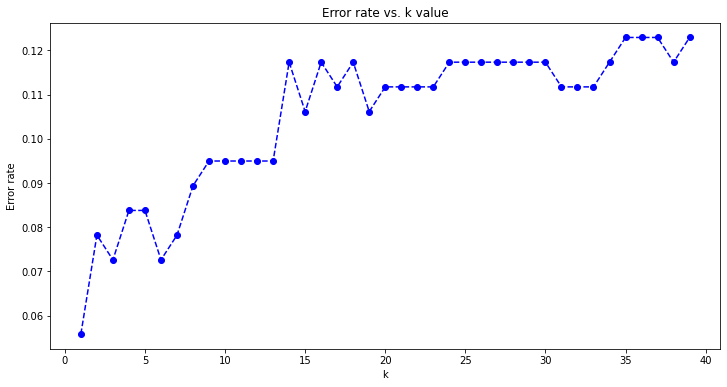

In [61]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue',linestyle = 'dashed', marker='o')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rate vs. k value')
plt.show()

Since in general kNN with k=1 implies over-fitting, I choose k=3

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_knn_Kaggle = knn.predict(X_Kaggle)

In [56]:
report(y_pred_knn)

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       106
         1.0       0.93      0.89      0.91        73

    accuracy                           0.93       179
   macro avg       0.93      0.92      0.92       179
weighted avg       0.93      0.93      0.93       179



[[101   5]
 [  8  65]]


In [57]:
submission = save(y_knn_Kaggle,'submission_knn.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [58]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(acc_knn)

0.9273743016759777


## Prediction results sumarry

In [71]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random forest', 'Decision tree', 'Stochastic gradient descent', 
             'Naive Bayes', 'Support Vector Classifier', 'KNN'],
    'Score': [acc_logreg, acc_rfc, acc_dtree, acc_sgd, 
             acc_nb, acc_grid_svc, acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Decision tree,0.966480
Logistic Regression,0.960894
Random forest,0.955307
Support Vector Classifier,0.938547
Stochastic gradient descent,0.932961
KNN,0.927374
Naive Bayes,0.837989


Decision tree seems to give the best prediction for studied dataset.

### Results of predictions on Kaggle test set

In [74]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Random forest', 'Decision tree', 'Stochastic gradient descent', 
             'Naive Bayes', 'Support Vector Classifier', 'KNN','gender submission'],
    'Score': [0.75119, 0.74641, 0.74162, 0.72966, 
             0.73684, 0.73923, 0.78229, 0.76555]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
KNN,0.78229
gender submission,0.76555
Logistic Regression,0.75119
Random forest,0.74641
Decision tree,0.74162
Support Vector Classifier,0.73923
Naive Bayes,0.73684
Stochastic gradient descent,0.72966


After checking all generated submission datasets I see huge discrepacy between results on Kaggle webside and on test set. Only KNN works better than simple gender submission. It indicates that I did sth wrong during feature engineering, I have to look at that later.